In [119]:
import numpy as np
from qiskit import assemble, Aer, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [22]:
qr = QuantumRegister(3, name='q')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
qc = QuantumCircuit(qr, crz, crx)

# Step 1: Prepare the Bell state with Alice and Bob's qubits
qc.h(1)
qc.cx(1, 2)

qc.barrier()

# Step 2: Alice's gates
qc.cx(0, 1)
qc.h(0)

qc.barrier()

# Step 3: Measure and send qubit measurements to the classical registers
qc.measure(0, 0)
qc.measure(1, 1)

# Step 4: Bob's gates
qc.x(2).c_if(crx, 1)
qc.z(2).c_if(crz, 1)

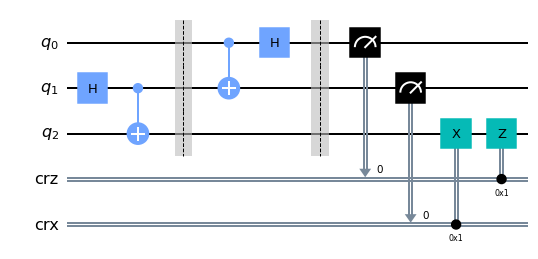

In [23]:
qc.draw('mpl')

In [107]:
def random_state():
    values = np.random.uniform(0, 1, size=4)
    norm_values = values/np.linalg.norm(values)
    qubit = norm_values[:2] + norm_values[2:]*1j
    return qubit#.reshape((2, 2))

[0.23941222+0.92505847j 0.25907254+0.14081914j]


/Users/oscar/miniconda3/envs/quantum/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


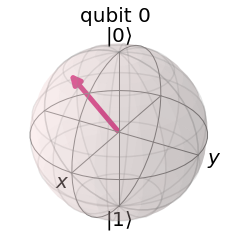

In [113]:
psi = random_state()

print(psi)
plot_bloch_multivector(psi)

In [114]:
init_gate = Initialize(psi)
init_gate.label = 'init'

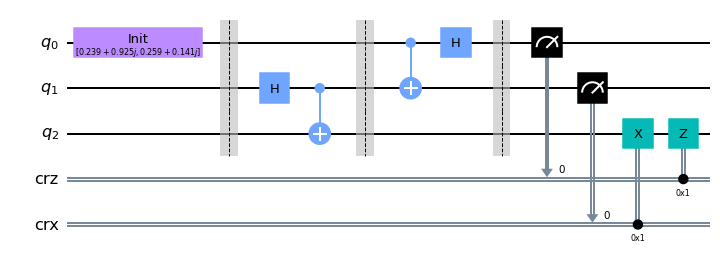

In [116]:
qr = QuantumRegister(3, name='q')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
qc = QuantumCircuit(qr, crz, crx)

# Step 0: Initialize Alice's qubit
qc.append(init_gate, [0])

qc.barrier()

# Step 1: Prepare the Bell state with Alice and Bob's qubits
qc.h(1)
qc.cx(1, 2)

qc.barrier()

# Step 2: Alice's gates
qc.cx(0, 1)
qc.h(0)

qc.barrier()

# Step 3: Measure and send qubit measurements to the classical registers
qc.measure(0, 0)
qc.measure(1, 1)

# Step 4: Bob's gates
qc.x(2).c_if(crx, 1)
qc.z(2).c_if(crz, 1)

qc.draw('mpl')

/Users/oscar/miniconda3/envs/quantum/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


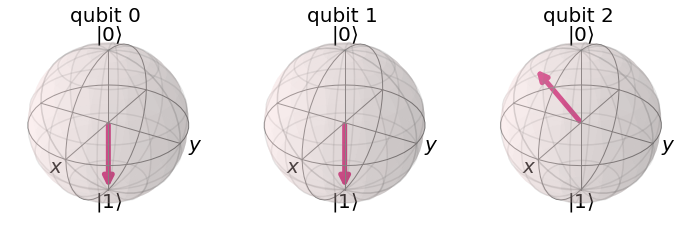

In [120]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)